## Seasonal means all in one

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [3]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)


<module 'pipvis' from '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pipvis.py'>

In [4]:
def add_subplot_border(ax, width=1, color=None ):

    fig = ax.get_figure()

    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)


In [5]:
colors = ['white',
          'goldenrod',
          'dimgray',
          'skyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']

## chceck that reassigning worked

In [6]:
cl_fwi_2013 = pickle.load(open('./pkls/fwi_clustmat_2013.pkl', 'rb'))
cl_fwi_2014 = pickle.load(open('./pkls/fwi_clustmat_2014.pkl', 'rb'))
cl_fwi_2015 = pickle.load(open('./pkls/fwi_clustmat_2015.pkl', 'rb'))
cl_fwi_2016 = pickle.load(open('./pkls/fwi_clustmat_2016.pkl', 'rb'))
sig_fwi_2013 = pickle.load(open('./pkls/fwi_datamat_2013.pkl', 'rb'))
sig_fwi_2014 = pickle.load(open('./pkls/fwi_datamat_2014.pkl', 'rb'))
sig_fwi_2015 = pickle.load(open('./pkls/fwi_datamat_2015.pkl', 'rb'))
sig_fwi_2016 = pickle.load(open('./pkls/fwi_datamat_2016.pkl', 'rb'))
cldes_2013_reass_fwi = pickle.load(open('./pkls/fwi_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass_fwi = pickle.load(open('./pkls/fwi_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass_fwi = pickle.load(open('./pkls/fwi_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass_fwi = pickle.load(open('./pkls/fwi_clno_5_2016_reass.pkl', 'rb'))

In [7]:
cl_ved_2013 = pickle.load(open('./pkls/ved_clustmat_2013.pkl', 'rb'))
cl_ved_2014 = pickle.load(open('./pkls/ved_clustmat_2014.pkl', 'rb'))
cl_ved_2015 = pickle.load(open('./pkls/ved_clustmat_2015.pkl', 'rb'))
cl_ved_2016 = pickle.load(open('./pkls/ved_clustmat_2016.pkl', 'rb'))
sig_ved_2013 = pickle.load(open('./pkls/ved_datamat_2013.pkl', 'rb'))
sig_ved_2014 = pickle.load(open('./pkls/ved_datamat_2014.pkl', 'rb'))
sig_ved_2015 = pickle.load(open('./pkls/ved_datamat_2015.pkl', 'rb'))
sig_ved_2016 = pickle.load(open('./pkls/ved_datamat_2016.pkl', 'rb'))
cldes_2013_reass_ved = pickle.load(open('./pkls/ved_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass_ved = pickle.load(open('./pkls/ved_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass_ved = pickle.load(open('./pkls/ved_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass_ved = pickle.load(open('./pkls/ved_clno_5_2016_reass.pkl', 'rb'))

In [8]:
cl_wind_2013 = pickle.load(open('./pkls/wind_clustmat_2013.pkl', 'rb'))
cl_wind_2014 = pickle.load(open('./pkls/wind_clustmat_2014.pkl', 'rb'))
cl_wind_2015 = pickle.load(open('./pkls/wind_clustmat_2015.pkl', 'rb'))
cl_wind_2016 = pickle.load(open('./pkls/wind_clustmat_2016.pkl', 'rb'))
sig_wind_2013 = pickle.load(open('./pkls/wind_datamat_2013.pkl', 'rb'))
sig_wind_2014 = pickle.load(open('./pkls/wind_datamat_2014.pkl', 'rb'))
sig_wind_2015 = pickle.load(open('./pkls/wind_datamat_2015.pkl', 'rb'))
sig_wind_2016 = pickle.load(open('./pkls/wind_datamat_2016.pkl', 'rb'))
cldes_2013_reass_wind = pickle.load(open('./pkls/wind_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass_wind = pickle.load(open('./pkls/wind_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass_wind = pickle.load(open('./pkls/wind_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass_wind = pickle.load(open('./pkls/wind_clno_5_2016_reass.pkl', 'rb'))

In [9]:
cl_halo_2013 = pickle.load(open('./pkls/halo_clustmat_2013.pkl', 'rb'))
cl_halo_2014 = pickle.load(open('./pkls/halo_clustmat_2014.pkl', 'rb'))
cl_halo_2015 = pickle.load(open('./pkls/halo_clustmat_2015.pkl', 'rb'))
cl_halo_2016 = pickle.load(open('./pkls/halo_clustmat_2016.pkl', 'rb'))
sig_halo_2013 = pickle.load(open('./pkls/halo_datamat_2013.pkl', 'rb'))
sig_halo_2014 = pickle.load(open('./pkls/halo_datamat_2014.pkl', 'rb'))
sig_halo_2015 = pickle.load(open('./pkls/halo_datamat_2015.pkl', 'rb'))
sig_halo_2016 = pickle.load(open('./pkls/halo_datamat_2016.pkl', 'rb'))
cldes_2013_reass_halo = pickle.load(open('./pkls/halo_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass_halo = pickle.load(open('./pkls/halo_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass_halo = pickle.load(open('./pkls/halo_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass_halo = pickle.load(open('./pkls/halo_clno_5_2016_reass.pkl', 'rb'))

In [15]:
def rowbuilder(sigmats,clustmats, ylab, tylim, fs, ax1,ax2,ax3,ax4,ax5):
    spr_st = 59; spr_e = 151; sum_st = 151; sum_e = 243;
    aut_st = 243; aut_e = 334;

    yrs = [2013,2014,2015,2016]; clustnos = [5,5,5,5]
    nodays =  [365,365,365,366]; clustdes = [1,2,3,4,5]; 

    for i in range(0,4):
        yr = yrs[i]; noday = nodays[i]
        tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]; noday = nodays[i]
        for i in range(0,len(clustdes)):
            tmean = (vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday))
            yrmean = np.nanmean(tmean); yrstd = np.nanstd(tmean)
            ax1.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')

    ax1.set_xlim([2012.5,2016.5]); ax1.set_ylim([0,tylim])
    ax1.yaxis.grid(True)
    ax1.set_xticks([2013,2014,2015,2016])
    ax1.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
    ax1.set_ylabel(ylab)
    ax1.set_title('FULL YEAR', fontsize = fs)
    add_subplot_border(ax1, width=2, color='black' )

    for i in range(0,4):
        yr = yrs[i]; noday = nodays[i]
        tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
        noday = nodays[i]
        for i in range(0,len(clustdes)):
            tmean = (vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday))
            yrmean = np.nanmean(tmean[spr_st:spr_e]); yrstd = np.nanstd(tmean[spr_st:spr_e])
            ax2.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
    ax2.yaxis.grid(True)
    ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,tylim])
    ax2.set_yticklabels([])
    ax2.set_xticks([2013,2014,2015,2016])
    ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
    ax2.set_title('SPRING', fontsize = fs)

    for i in range(0,4):
        yr = yrs[i]; noday = nodays[i]
        tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
        noday = nodays[i]
        for i in range(0,len(clustdes)):
            tmean = (vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday))
            yrmean = np.nanmean(tmean[sum_st:sum_e]); yrstd = np.nanstd(tmean[sum_st:sum_e])
            ax3.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
    ax3.yaxis.grid(True)
    ax3.set_xlim([2012.5,2016.5]); ax3.set_ylim([0,tylim])
    ax3.set_yticklabels([])
    ax3.set_xticks([2013,2014,2015,2016])
    ax3.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
    ax3.set_title('SUMMER', fontsize = fs)

    for i in range(0,4):
        yr = yrs[i]; noday = nodays[i]
        tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
        noday = nodays[i]
        for i in range(0,len(clustdes)):
            tmean = (vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday))
            yrmean = np.nanmean(tmean[aut_st:aut_e]); yrstd = np.nanstd(tmean[aut_st:aut_e])
            ax4.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
    ax4.yaxis.grid(True)
    ax4.set_xlim([2012.5,2016.5]); ax4.set_ylim([0,tylim])
    ax4.set_yticklabels([])
    ax4.set_xticks([2013,2014,2015,2016])
    ax4.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
    ax4.set_title('AUTUMN', fontsize = fs)

    for i in range(0,4):
        yr = yrs[i]; noday = nodays[i]
        tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
        noday = nodays[i]
        for i in range(0,len(clustdes)):
            tmean = (vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday))
            wintmean = np.concatenate((tmean[0:spr_st],tmean[aut_e:(np.size(tmean)-1)]),axis = 0)
            yrmean = np.nanmean(wintmean); yrstd = np.nanstd(wintmean)
            ax5.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
    ax5.yaxis.grid(True)
    ax5.set_xlim([2012.5,2016.5]); ax5.set_ylim([0,tylim])
    ax5.set_yticklabels([])
    ax5.set_xticks([2013,2014,2015,2016])
    ax5.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
    ax5.set_title('WINTER', fontsize = fs)

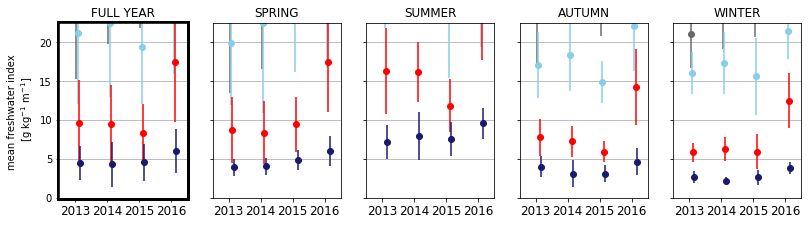

In [11]:
tylim = 22.5
fact = 0.7

fs = 12
#season definitions
#spring march 1 to may 31
fig = plt.figure(figsize=(19*fact, 4.6*fact))

ax1 = plt.subplot2grid((1,5), (0,0), colspan=1, rowspan=1) 
ax2 = plt.subplot2grid((1,5), (0,1), colspan=1, rowspan=1) 
ax3 = plt.subplot2grid((1,5), (0,2), colspan=1, rowspan=1) 
ax4 = plt.subplot2grid((1,5), (0,3), colspan=1, rowspan=1) 
ax5 = plt.subplot2grid((1,5), (0,4), colspan=1, rowspan=1) 

sigmats = [sig_fwi_2013,sig_fwi_2014,sig_fwi_2015,sig_fwi_2016]
clustmats = [cldes_2013_reass_fwi,cldes_2014_reass_fwi,\
             cldes_2015_reass_fwi,cldes_2016_reass_fwi]
ylab = 'mean freshwater index \n [g kg$^{-1}$ m$^{-1}$]'

rowbuilder(sigmats,clustmats, ylab, tylim, ax1,ax2,ax3,ax4,ax5)



## difficult



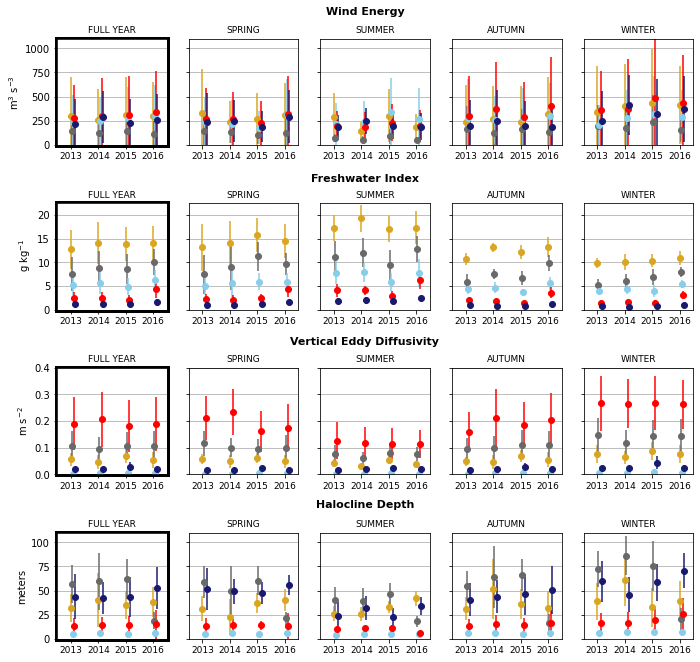

In [22]:
fact = 0.7
fact = 0.6
fs = 9

fig, axs = plt.subplots(4,5, figsize=(19*fact, 4.6*4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)
fig.text(0.5, 0.91, 'Wind Energy', fontsize = fs+2, fontweight = 'bold', ha = 'center')

sigmats = [sig_wind_2013,sig_wind_2014,sig_wind_2015,sig_wind_2016]
clustmats = [cldes_2013_reass_wind,cldes_2014_reass_wind,\
             cldes_2015_reass_wind,cldes_2016_reass_wind]
ylab = 'm$^{3}$ s$^{-3}$'
rowbuilder(sigmats,clustmats, ylab, 1100, fs, axs[0],axs[1],axs[2],axs[3],axs[4])

fig.text(0.5, 0.70, 'Freshwater Index', fontsize = fs+2, fontweight = 'bold', ha = 'center')

sigmats = [sig_fwi_2013*0.25,sig_fwi_2014*0.25,sig_fwi_2015*0.25,sig_fwi_2016*0.25]
clustmats = [cldes_2013_reass_fwi,cldes_2014_reass_fwi,\
             cldes_2015_reass_fwi,cldes_2016_reass_fwi]
ylab = ' g kg$^{-1}$'
rowbuilder(sigmats,clustmats, ylab, 22.5, fs, axs[5],axs[6],axs[7],axs[8],axs[9])

fig.text(0.5, 0.69-0.21+0.015, 'Vertical Eddy Diffusivity', fontsize = fs+2, fontweight = 'bold', ha = 'center')
sigmats = [sig_ved_2013,sig_ved_2014,sig_ved_2015,sig_ved_2016]
clustmats = [cldes_2013_reass_ved,cldes_2014_reass_ved,\
             cldes_2015_reass_ved,cldes_2016_reass_ved]
ylab = 'm s$^{-2}$'
rowbuilder(sigmats,clustmats, ylab, 0.4, fs, axs[10],axs[11],axs[12],axs[13],axs[14])

fig.text(0.5, 0.69-0.21*2+0.02, 'Halocline Depth', fontsize = fs+2, fontweight = 'bold', ha = 'center')
sigmats = [sig_halo_2013,sig_halo_2014,sig_halo_2015,sig_halo_2016]
clustmats = [cldes_2013_reass_halo,cldes_2014_reass_halo,\
             cldes_2015_reass_halo,cldes_2016_reass_halo]
ylab = 'meters'
rowbuilder(sigmats,clustmats, ylab, 110, fs, axs[15],axs[16],axs[17],axs[18],axs[19])
fig.savefig('./paper_figs/MF04-seasmeans.jpg', bbox_inches='tight', dpi = 300)
#plt.text('Row2', fontsize = fs+3, y = 0.65)